# **7.3 The while statement**

### As an exercise, rewrite the function print_n from Section 5.8 using iteration instead of recursion.

In [1]:
def print_n(s, n):
    while n > 0:
        n -= 1
        print(s)

In [2]:
print_n("oi", 3)

oi
oi
oi


# **Exercise 1**

### Copy the loop from Section 7.5 and encapsulate it in a function called mysqrt that takes a as a parameter, chooses a reasonable value of x, and returns an estimate of the square root of a.

In [248]:
def mysqrt(a):
    '''Newton's method to sqrt'''
    if a % 2 == 0:
        x = 2
    else:
        x = 3

    while True:
        y = (x + a/x) / 2

        # Breaks if close enough to final value
        if abs(y-x) < 1e-13:
            return x
            break
            
        x = y



### To test it, write a function named test_square_root that prints a table like this:
```
a   mysqrt(a)     math.sqrt(a)  diff
-   ---------     ------------  ----
1.0 1.0           1.0           0.0
2.0 1.41421356237 1.41421356237 2.22044604925e-16
3.0 1.73205080757 1.73205080757 0.0
4.0 2.0           2.0           0.0
5.0 2.2360679775  2.2360679775  0.0
6.0 2.44948974278 2.44948974278 0.0
7.0 2.64575131106 2.64575131106 0.0
8.0 2.82842712475 2.82842712475 4.4408920985e-16
9.0 3.0           3.0           0.0
```
The first column is a number, a; the second column is the square root of a computed with mysqrt; the third column is the square root computed by math.sqrt; the fourth column is the absolute value of the difference between the two estimates.

In [259]:
import math

def test_square_root(a):
    '''Tests mysqrt for a range of numbers'''
    # Table head
    print("a    mysqrt(a)       math.sqrt(a)    diff")
    print("-    ---------       ------------    ----")

    for i in a:
        rt = "{:.13f}".format(float(mysqrt(i)))
        mrt = "{:.13f}".format(float(math.sqrt(i)))
        spc1= " " * (3 - len(str(i)))
        diff = float(rt) - float(mrt)
        print(i, spc1, rt, mrt, diff)

In [260]:
test_square_root(range(1, 10))

a    mysqrt(a)       math.sqrt(a)    diff
-    ---------       ------------    ----
1    1.0000000000000 1.0000000000000 0.0
2    1.4142135623731 1.4142135623731 0.0
3    1.7320508075689 1.7320508075689 0.0
4    2.0000000000000 2.0000000000000 0.0
5    2.2360679774998 2.2360679774998 0.0
6    2.4494897427832 2.4494897427832 0.0
7    2.6457513110646 2.6457513110646 0.0
8    2.8284271247462 2.8284271247462 0.0
9    3.0000000000000 3.0000000000000 0.0


# **Exercise 2**

### The built-in function eval takes a string and evaluates it using the Python interpreter. For example:
```
>>> eval('1 + 2 * 3')
7
>>> import math
>>> eval('math.sqrt(5)')
2.2360679774997898
>>> eval('type(math.pi)')
<class 'float'>
```
### Write a function called eval_loop that iteratively prompts the user, takes the resulting input and evaluates it using eval, and prints the result.

It should continue until the user enters 'done', and then return the value of the last expression it evaluated.

In [6]:
import math

def eval_loop():
    while True:
        text = input(">>> ")
        if text == 'done':
            break

        print(eval(text))
        continue
  

In [262]:
eval_loop()

>>> "Hello" + " " + "World!"
Hello World!
>>> 2 + 2 * 3
8
>>> done


# **Exercise 3**

The mathematician Srinivasa Ramanujan found an infinite series that can be used to generate a numerical approximation of 1 / π:

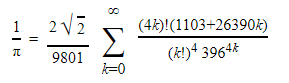

### Write a function called estimate_pi that uses this formula to compute and return an estimate of π. It should use a while loop to compute terms of the summation until the last term is smaller than 1e-15 (which is Python notation for 10−15).
You can check the result by comparing it to math.pi. <br>
Solution: http://thinkpython2.com/code/pi.py.

In [267]:
import math

# Code by Allen Downey
def factorial(n):
    '''Gets factorial of n'''
    if n == 0:
        return 1
    else:
        fac = factorial(n - 1)
        return n * fac

def estimate_pi():
    '''Code to Srinivasa Ramanujan formula'''
    total = 0
    k = 0
    factor = 2 * math.sqrt(2) / 9801
    while True:
        numerator = factorial(4*k) * (1103 + 26390*k)
        denominator = factorial(k)**4 * 396**(4*k)
        term = factor * numerator / denominator
        total += term
        
        if abs(term) < 1e-15:
            break
        k += 1

    return 1 / total

print(estimate_pi())

3.141592653589793
